<span style="color: #3fbf72">Chan.py:131--------------------------</span>

Chan.py:132:data_src DATA_SRC.BAO_STOCK
Chan.py:133:stockapi_cls <class 'DataAPI.BaoStockAPI.CBaoStock'>
login success!


<span style="color: #3fbf72">Chan.py:139--------------------------</span>

[None]


<span style="color: #3fbf72">Chan.py:75 stock_data>>>>>>>>>>>>>>>>></span>

类型:generator


<span style="color: #3fbf72">Chan.py:77 <<<<<<<<<<<<<<<<<<<<<</span>

<span style="color: #3fbf72">BaoStockAPI.py:62 >>>>>>>>>>>>>>>>>>>##### 打印结果集 ####<<<<<<<<<<<<<<<<</span>

类型:DataFrame

         date           open           high            low          close     volume           amount      turn
0  2018-01-02  12.4562842500  12.9974561500  12.4282926000  12.7828535000  208159255  2856543822.1800  1.230402
1  2018-01-03  12.8108451500  12.9321423000  12.3163260000  12.4376231500  296249840  4006220766.9400  1.751094
2  2018-01-04  12.4282926000  12.4749453500  12.2510121500  12.3629787500  185450948  2454543516.4100  1.096176
3  2018-01-05  12.3256565500  12.4562842500  12.2696732500  12.4096315000  121031272  1603289517.9300  0.715400
4  2018-01-08  12.3629787500  12.4003009500  11.9990873000  12.0923928000  215862081  2806099169.6600  1.275932
5  2018-01-09  12.0923928000  12.3163260000  12.0550706000  12.2043594000  134434509  1754315792.4700  0.794625
6  2018-01-10  12.1670372000  12.5869119500  12.0550706000  12.5682508500  240327736  3196055830.9100  1.420545
7  2018-01-11  12.5122675500  12.6802174500  12.3816398500  12.5029370000  144387781  1937

<span style="color: #3fbf72">PlotDriver.py:156, init-->plot_para</span>

{'seg': {}, 'bi': {}, 'figure': {}}


<span style="color: #3fbf72">PlotDriver.py:164,初始化plot_driver</span>

<span style="color: #3fbf72">PlotDriver.py:238,绘制元素, plot_config.get(某项配置,缺省False)  </span>

<span style="color: #3fbf72">plot_config type:dict</span>

{'plot_kline': True, 'plot_kline_combine': True, 'plot_bi': True, 'plot_boll': True, 'plot_seg': True, 'plot_segseg': False, 'plot_zs': True, 'plot_macd': True, 'plot_mean': False, 'plot_channel': False, 'plot_bsp': True, 'plot_extrainfo': True}


<span style="color: #3fbf72">plot_para type:dict</span>

{'seg': {}, 'bi': {}, 'figure': {}}


<span style="color: #3fbf72">debug-End</span>

<span style="color: #3fbf72">PlotDriver.py: 288,绘制K线图</span>

<span style="color: #3fbf72">画笔>>>draw_bi</span>

<span style="color: #3fbf72">画线段>>>draw_seg</span>

[<Plot.PlotMeta.CSeg_meta object at 0x12108cfd0>, <Plot.PlotMeta.CSeg_meta object at 0x12108d010>, <Plot.PlotMeta.CSeg_meta object at 0x12108d150>, <Plot.PlotMeta.CSeg_meta object at 0x12108d290>, <Plot.PlotMeta.CSeg_meta object at 0x12108d3d0>, <Plot.PlotMeta.CSeg_meta object at 0x12108d550>, <Plot.PlotMeta.CSeg_meta object at 0x12108d6d0>, <Plot.PlotMeta.CSeg_meta object at 0x12108d710>]
类型:CSeg_meta
CSeg_meta
{'begin_x': 4, 'begin_y': 11.9990873, 'end_x': 13, 'end_y': 14.11712215, 'dir': <BI_DIR.UP: 1>, 'is_sure': False, 'has_tl': False, 'tl_y0': None, 'tl_y1': None, 'tl_x0': None, 'tl_x1': None}
类型:CSeg_meta
CSeg_meta
{'begin_x': 13, 'begin_y': 14.11712215, 'end_x': 123, 'end_y': 7.88431475, 'dir': <BI_DIR.DOWN: 2>, 'is_sure': False, 'has_tl': False, 'tl_y0': None, 'tl_y1': None, 'tl_x0': None, 'tl_x1': None}
类型:CSeg_meta
CSeg_meta
{'begin_x': 123, 'begin_y': 7.88431475, 'end_x': 430, 'end_y': 16.8636688, 'dir': <BI_DIR.UP: 1>, 'is_sure': True, 'has_tl': False, 'tl_y0': None, 'tl_y

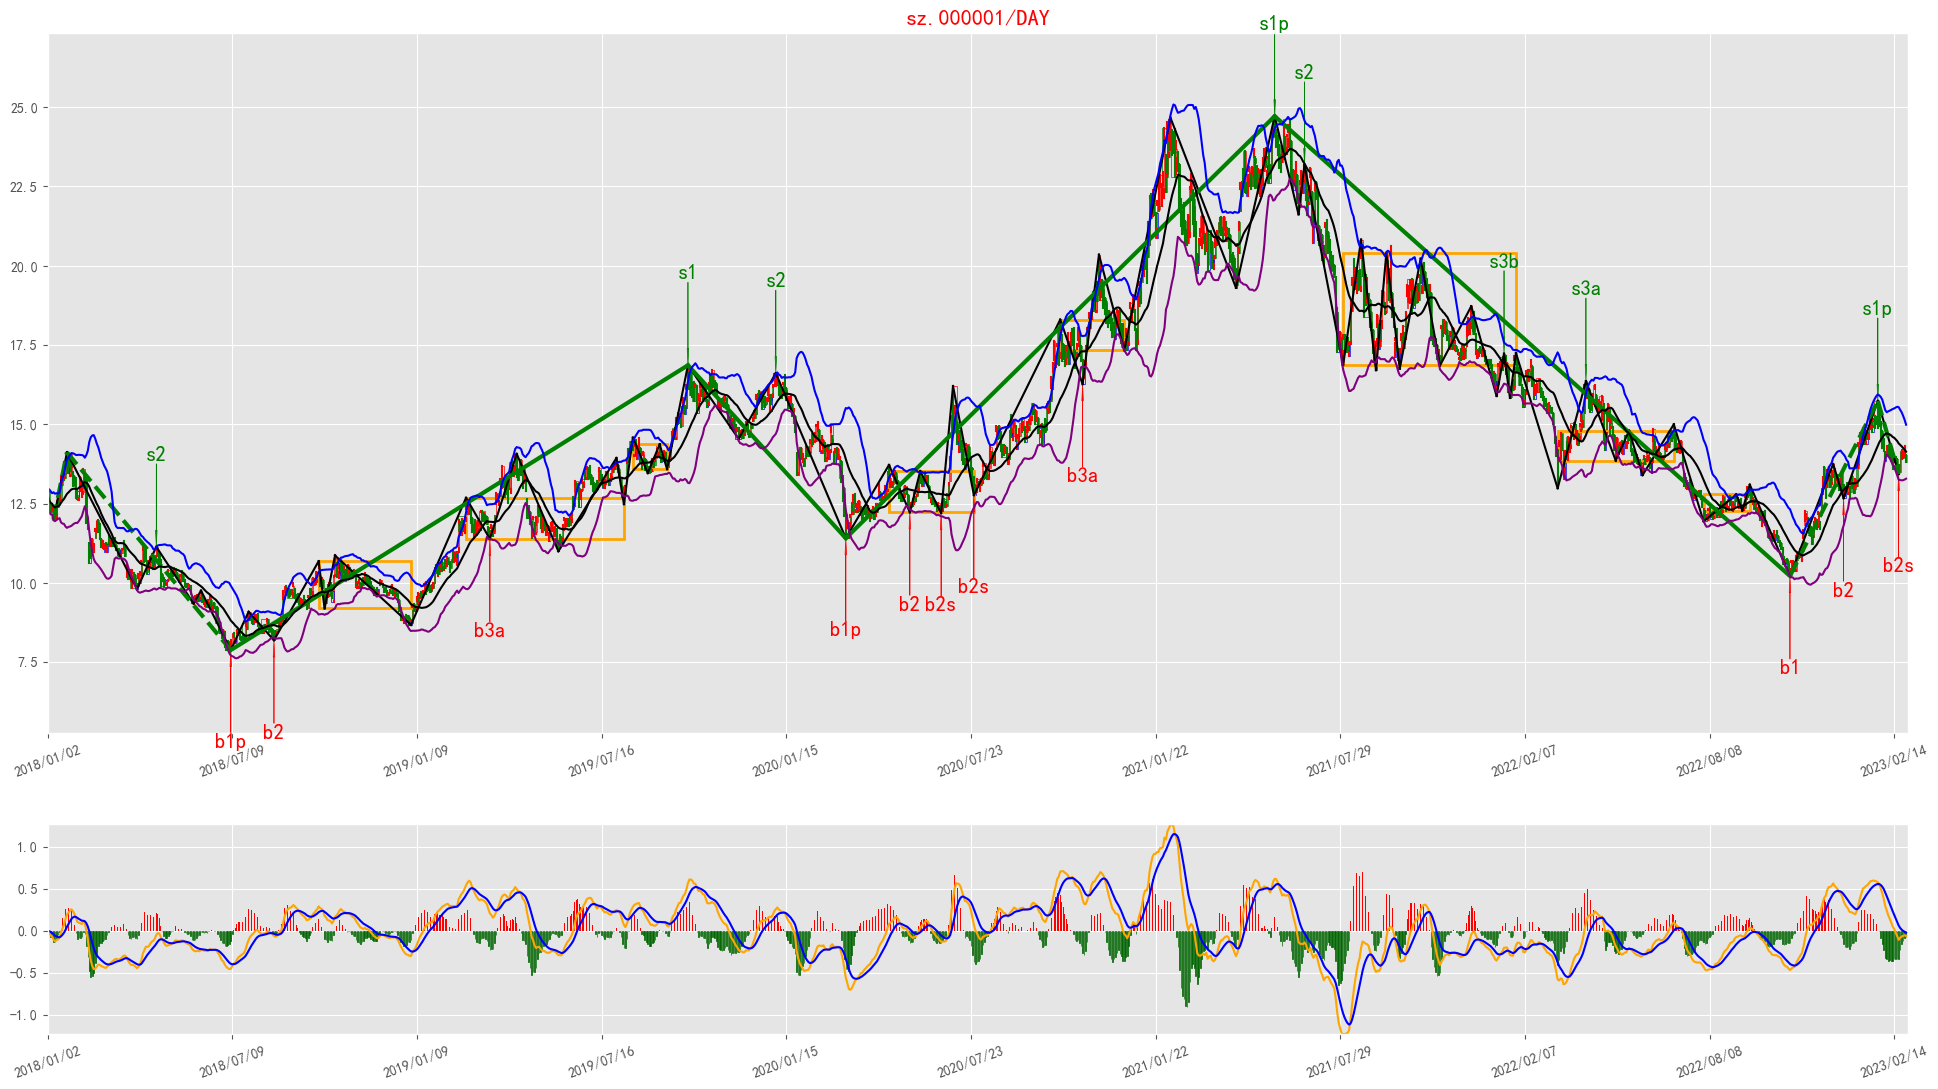

In [1]:
import os
from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import AUTYPE, DATA_SRC, KL_TYPE
from Plot.AnimatePlotDriver import CAnimateDriver
from Plot.PlotDriver import CPlotDriver

# %matplotlib inline
# %pylab inline

code = "sz.000001"
begin_time = "2018-01-01"
end_time = None
data_src = DATA_SRC.BAO_STOCK
lv_list = [KL_TYPE.K_DAY]

config = CChanConfig({
    "bi_strict": True,
    "triger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": False,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warming": True,
})

plot_config = {
    "plot_kline": True,
    # "plot_kline": False,
    "plot_kline_combine": True,
    "plot_bi": True,
    # "plot_bi": False,
    'plot_boll': True,
    # "plot_seg": False,
    "plot_seg": True,
    
    # "plot_eigen": True,
    "plot_segseg": False,    
    "plot_zs": True,
    # "plot_zs": False,
    "plot_macd": True,
    "plot_mean": False,
    "plot_channel": False,
    "plot_bsp": True,
    # "plot_bsp": False,
    "plot_extrainfo": True,
}

plot_para = {
    "seg": {
    },
    "bi": {
        # "show_num": True,
        # "disp_end": True,
    },
    "figure": {
        # "x_range": 50,
    },
}
chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

if not config.triger_step:
    
    plot_driver = CPlotDriver(
        chan,
        plot_config=plot_config,
        plot_para=plot_para,
    )
else:
    CAnimateDriver(
        chan,
        plot_config=plot_config,
        plot_para=plot_para,
    )